#### Importing Libs

In [1]:
from core.utils import UtilsEDA
from core.neo4jHandler import SendDataNeo4j, GraphBuilder
from decouple import config
import pandas as pd
import re

#### Load Env Vars

In [2]:
PROCESSED_DATA = config("PROCESSED_DATA")
URI = config("URI")
USER = config("USER")
PASSWORD = config("PASSWORD")

#### Load data

In [3]:
df_fieldKnowledge = pd.read_csv(filepath_or_buffer=PROCESSED_DATA+"fieldKnowledge_nodes.csv")

#### Processing data

In [4]:
# View loaded data
df_fieldKnowledge

,codCBO,role,field_knowledge,depth
0,202115,Tecnólogo em mecatrônica,Automação nos processos de produção industrial,5.0
1,202115,Tecnólogo em mecatrônica,Ciência da computação,4.0
2,202115,Tecnólogo em mecatrônica,Comercialização,4.0
3,202115,Tecnólogo em mecatrônica,Compras,3.0
4,202115,Tecnólogo em mecatrônica,Desenho técnico e de projeto,4.5
...,...,...,...,...
41899,262820,Dramaturgo de dança,História,4.5
41900,262820,Dramaturgo de dança,Letras,4.0
41901,262820,Dramaturgo de dança,Métodos e procedimentos científicos,4.0
41902,262820,Dramaturgo de dança,Tecnologia da informação e comunicação,3.5


In [5]:
# Create dataframe with unique values of 'field_knowledge'
nodes_fieldKnowledge = pd.DataFrame(df_fieldKnowledge["field_knowledge"].unique(), columns=["name"])
# Normalize and minimum cleaning data of column "name"
nodes_fieldKnowledge["name"] = nodes_fieldKnowledge["name"].apply(lambda x: " ".join(re.sub(pattern=r"\(especificar.*\)", repl="", string=x).split()))

#### Save data in Neo4j

In [6]:
# Create object of SendDataNeo4j class
dataHandler_neo4j = SendDataNeo4j(uri=URI, user=USER, password=PASSWORD)
# Create nodes of FieldKnowledge
dataHandler_neo4j.create_nodes(dataframe=nodes_fieldKnowledge, label="FieldKnowledge")

>>> Save Line: 0, Label: FieldKnowledge
>>> Save Line: 1, Label: FieldKnowledge
>>> Save Line: 2, Label: FieldKnowledge
>>> Save Line: 3, Label: FieldKnowledge
>>> Save Line: 4, Label: FieldKnowledge
>>> Save Line: 5, Label: FieldKnowledge
>>> Save Line: 6, Label: FieldKnowledge
>>> Save Line: 7, Label: FieldKnowledge
>>> Save Line: 8, Label: FieldKnowledge
>>> Save Line: 9, Label: FieldKnowledge
>>> Save Line: 10, Label: FieldKnowledge
>>> Save Line: 11, Label: FieldKnowledge
>>> Save Line: 12, Label: FieldKnowledge
>>> Save Line: 13, Label: FieldKnowledge
>>> Save Line: 14, Label: FieldKnowledge
>>> Save Line: 15, Label: FieldKnowledge
>>> Save Line: 16, Label: FieldKnowledge
>>> Save Line: 17, Label: FieldKnowledge
>>> Save Line: 18, Label: FieldKnowledge
>>> Save Line: 19, Label: FieldKnowledge
>>> Save Line: 20, Label: FieldKnowledge
>>> Save Line: 21, Label: FieldKnowledge
>>> Save Line: 22, Label: FieldKnowledge
>>> Save Line: 23, Label: FieldKnowledge
>>> Save Line: 24, Label: 

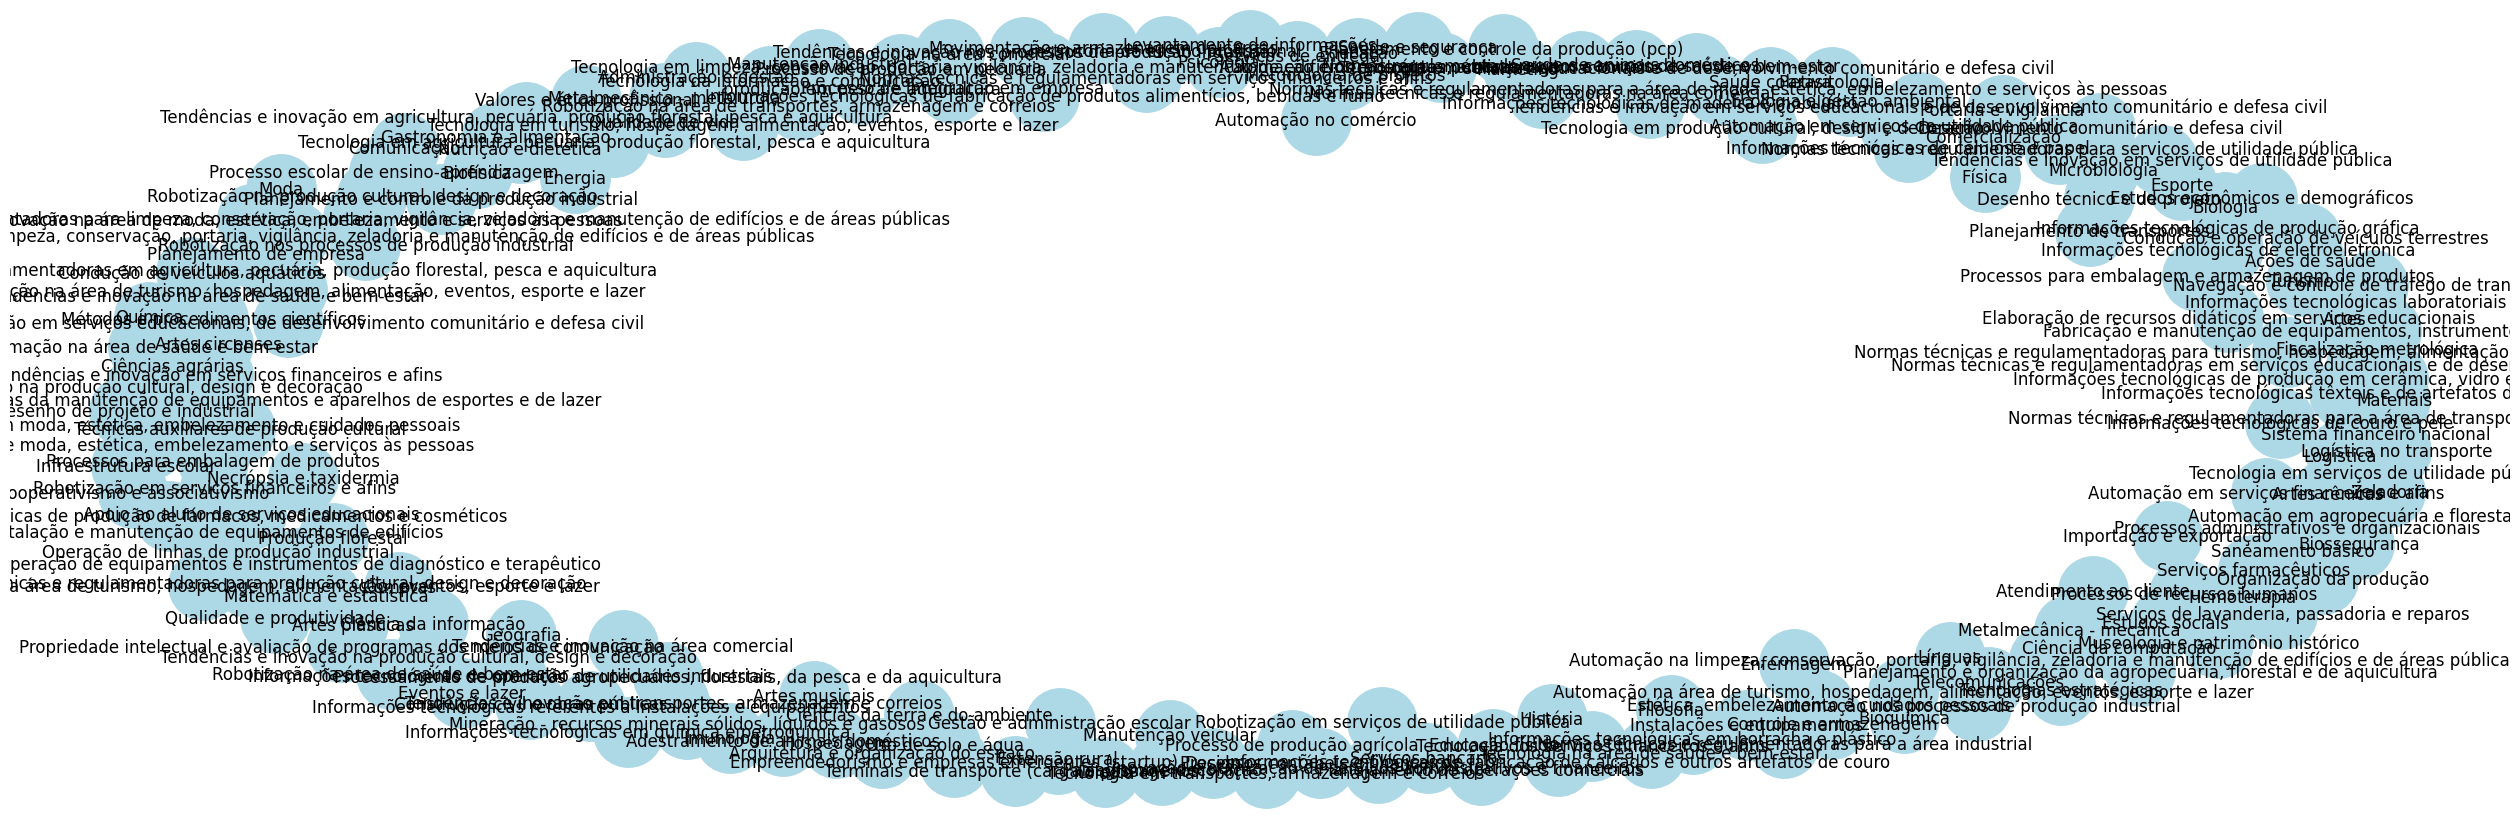

In [7]:
# Create query to visualize data
query = '''
    MATCH (n:FieldKnowledge)
    RETURN n
'''
# Instance object of GraphBuilder class
graph_builder = GraphBuilder(uri=URI, user=USER, password=PASSWORD)
# Plot graph with return of query
graph_builder.build(property_node="name", query=query)

In [8]:
# Create dataframe of edges between occupation nodes and fiel knowledge nodes
edges_fieldKnowledge = df_fieldKnowledge[["codCBO", "field_knowledge", "depth"]]

In [9]:
# Create edges between Occupation nodes and FieldKnowledge nodes
dataHandler_neo4j.send_edges_neo4j(
    dataframe=edges_fieldKnowledge,
    label_node="Occupation",
    label_node2="FieldKnowledge",
    property_node="codCBO",
    property_node2="field_knowledge",
    search_property_node="codCBO",
    search_property_node2="name",
    relationship_name="DEPTH_FIELD",
    property_in_edge=True,
    property_edge="level",
    weigth_edge="depth")

>> Save edge 0
>> Save edge 1
>> Save edge 2
>> Save edge 3
>> Save edge 4
>> Save edge 5
>> Save edge 6
>> Save edge 7
>> Save edge 8
>> Save edge 9
>> Save edge 10
>> Save edge 11
>> Save edge 12
>> Save edge 13
>> Save edge 14
>> Save edge 15
>> Save edge 16
>> Save edge 17
>> Save edge 18
>> Save edge 19
>> Save edge 20
>> Save edge 21
>> Save edge 22
>> Save edge 23
>> Save edge 24
>> Save edge 25
>> Save edge 26
>> Save edge 27
>> Save edge 28
>> Save edge 29
>> Save edge 30
>> Save edge 31
>> Save edge 32
>> Save edge 33
>> Save edge 34
>> Save edge 35
>> Save edge 36
>> Save edge 37
>> Save edge 38
>> Save edge 39
>> Save edge 40
>> Save edge 41
>> Save edge 42
>> Save edge 43
>> Save edge 44
>> Save edge 45
>> Save edge 46
>> Save edge 47
>> Save edge 48
>> Save edge 49
>> Save edge 50
>> Save edge 51
>> Save edge 52
>> Save edge 53
>> Save edge 54
>> Save edge 55
>> Save edge 56
>> Save edge 57
>> Save edge 58
>> Save edge 59
>> Save edge 60
>> Save edge 61
>> Save edge 62
>>

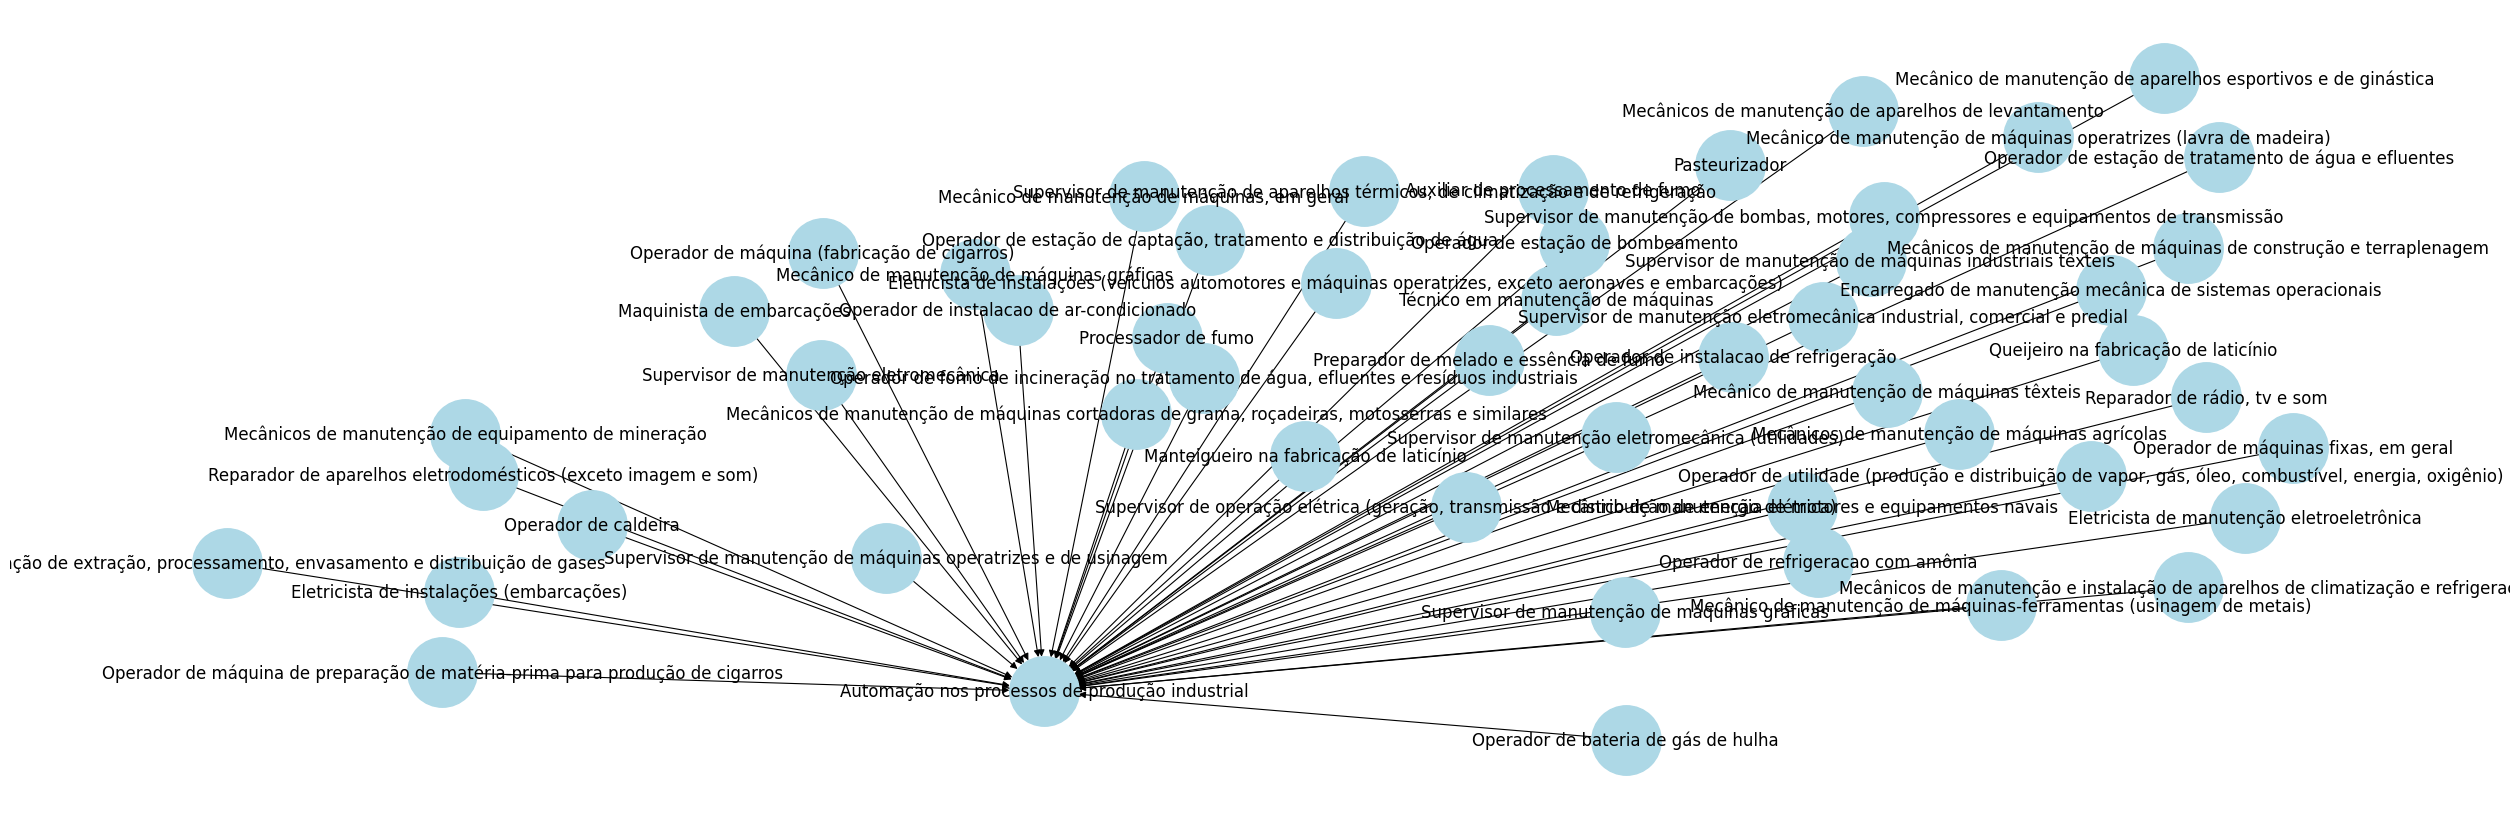

In [10]:
# View nodes added
query = '''
    MATCH (occupation:Occupation)-[r]-(field:FieldKnowledge)
    RETURN occupation, r, field
'''
graph_builder.build("name", query=query, limit_entities_return=50)